<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

## Данные автора

Ник на  Kaggle: Alexander_Morshinin

Score на момент отправки тетради: 0.84906

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

#### Решение

1. Сделаем рандомный семпл данных и проведем визуальный анализ.

In [6]:
data.sample(n=20, random_state=11)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
218,31,50.40,1580.1,Female,1,Yes,No,No,No phone service,DSL,Yes,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),0
1938,25,98.50,2514.5,Female,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4332,11,20.10,221.35,Female,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),1
579,53,108.25,5935.1,Female,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
3932,8,66.70,579,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,0
87,11,50.55,565.35,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,0
4259,71,109.60,7854.15,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,0
1850,21,75.30,1570.7,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
1379,24,20.80,469.65,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),0


**Вывод**: визуальный анализ обнаружил пропуск значения признака *TotalSpent* в строке с индексом 1048. Зная, что этот признак является числовым, далее будет необходимо заменить его некоторым значением.

2. Посмотрим на NaN в данных.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Построим табличку NaN для каждого признака.

In [8]:
data.isnull().sum(axis=0)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

**Вывод**: в данных нет NaN. Но мы уже знаем, что признак **TotalSpent** имеет тип object и содержит пропуски. Значит пропуски в датасете могут быть заданы не только с помощью NaN, но и пустыми строками.

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

#### Решение

1. *Предворительно исследуем признак **TotalSpent**, чтобы понять, какие значения он имеет и как заполнить пропуски.*

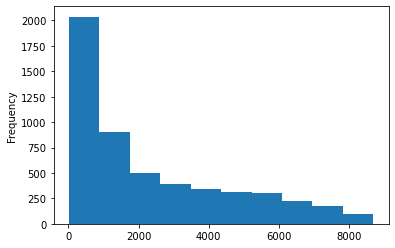

In [9]:
data[data['TotalSpent'] != ' ']['TotalSpent'].astype("float64").plot.hist()

Видим, что признак распределен не по нормальному закону (скорее экспоненциальное распределение). Целесообразно заменить пропущенные значения медианой распределения.

In [10]:
total_spent_median = data[data['TotalSpent'] != ' ']['TotalSpent'].astype("float64").median()

In [11]:
print("median: ", total_spent_median)

median:  1410.25


In [12]:
data['TotalSpent'].replace({' ': total_spent_median}, inplace=True)

Посмотрим на 1048 строку датасета (в ней был пропуск)

In [13]:
data.iloc[1048]

ClientPeriod                                  0
MonthlySpending                           25.75
TotalSpent                              1410.25
Sex                                        Male
IsSeniorCitizen                               0
HasPartner                                  Yes
HasChild                                    Yes
HasPhoneService                             Yes
HasMultiplePhoneNumbers                     Yes
HasInternetService                           No
HasOnlineSecurityService    No internet service
HasOnlineBackup             No internet service
HasDeviceProtection         No internet service
HasTechSupportAccess        No internet service
HasOnlineTV                 No internet service
HasMovieSubscription        No internet service
HasContractPhone                       Two year
IsBillingPaperless                           No
PaymentMethod                      Mailed check
Churn                                         0
Name: 1048, dtype: object

Значение признака *TotalSpent* совпадает с медианой. Теперь преобразуем этот признак к типу float64.

In [14]:
data['TotalSpent'] = data['TotalSpent'].astype("float64")

Распределение численных признаков.

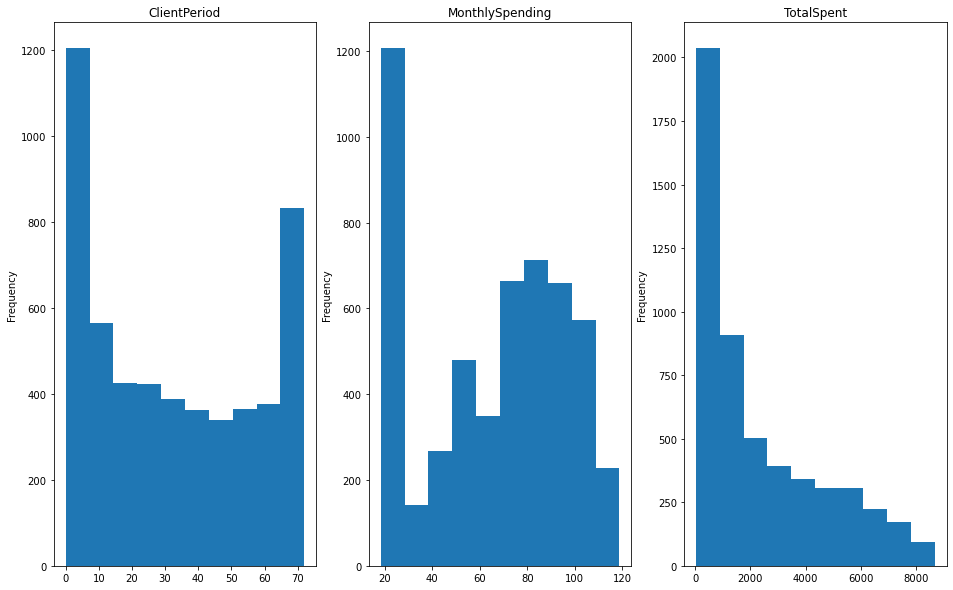

In [15]:
rows = 1
columns = len(num_cols)
fig = plt.figure(figsize=(16,10))
for i in range(1, columns + 1):
    fig.add_subplot(rows, columns, i)
    data[num_cols[i - 1]].astype("float64").plot.hist()
    plt.title(num_cols[i - 1])

Посмотрим на категориальные фичи.

In [16]:
for cat_col in cat_cols:
    print(data[cat_col].value_counts())
    print()

Male      2655
Female    2627
Name: Sex, dtype: int64

0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

No     2705
Yes    2577
Name: HasPartner, dtype: int64

No     3676
Yes    1606
Name: HasChild, dtype: int64

Yes    4761
No      521
Name: HasPhoneService, dtype: int64

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64

No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: in

Категориальные фичи не содержат пропуски. Построим бары.

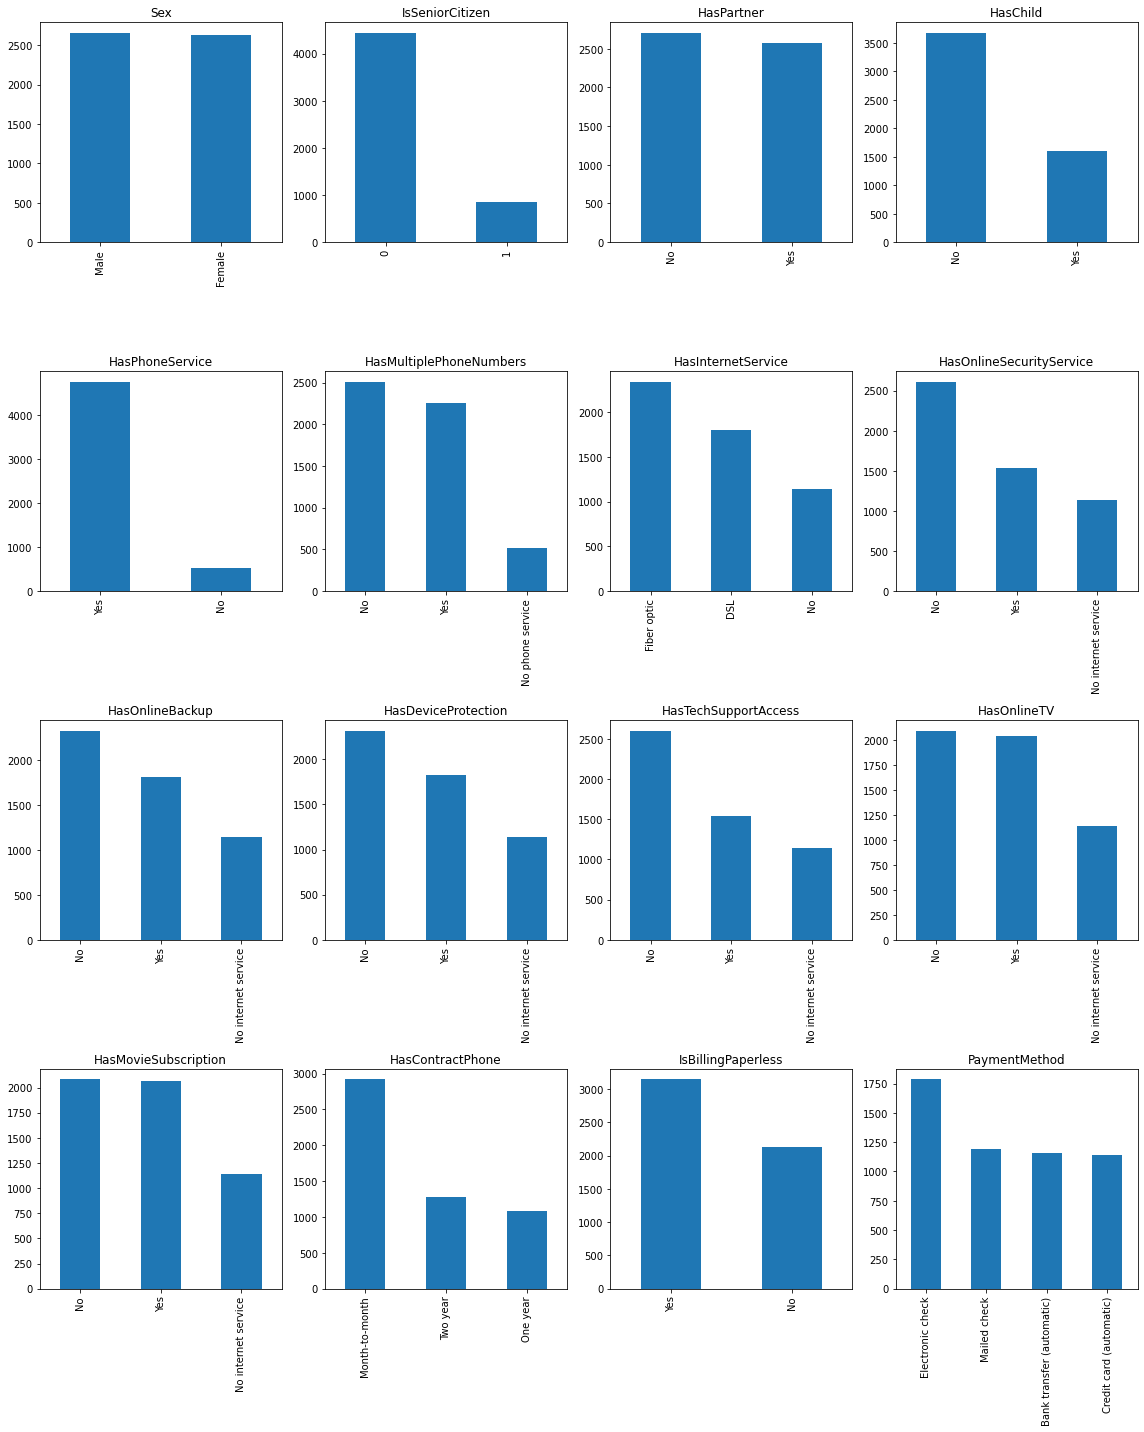

In [17]:
rows = 4
columns = 4
fig = plt.figure(figsize=(16,20))

for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    data[cat_cols[i - 1]].value_counts().plot(kind='bar')
    plt.title(cat_cols[i - 1])
    fig.tight_layout()

**Вывод**: явный разбаланс в признаках *IsSeniorCitizen* и *HasPhoneService*. В признаках *HasChild* и *HasMultiplePhoneNumbers* также наблюдается перекос в сторону одного из признаков, хотя и не такой сильный.

2. Исследуем распределение выходного признака.

In [18]:
data[target_col].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

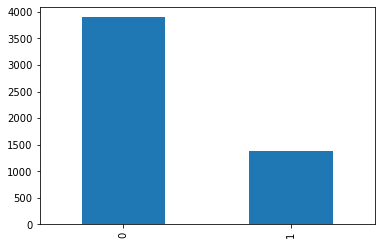

In [19]:
data[target_col].value_counts().plot(kind='bar')

**Вывод**: выходной класс близок к разбалансу, хотя и нельзя сказать, что наблюдается подавляющая доминация одного из признаков (соотношение ~ 1:3). Целесообразно использовать ROC-AUC вместо Accuracy.

3. Визауальный анализ с помощью sns.

In [20]:
import seaborn as sns

Построим ящики с усами численных признаков.

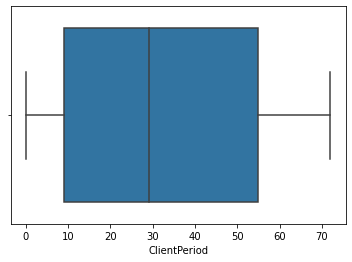

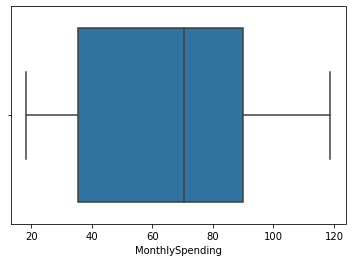

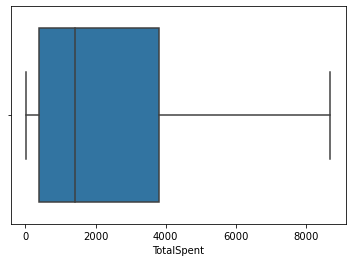

In [21]:
for i in num_cols:
    sns.boxplot(data[i])
    plt.show()

На ящиках с усами не видно явных аномалий(выходящих за интерквартильный размах). Построим матрицу корреляций (будет работать только для численных признаков).

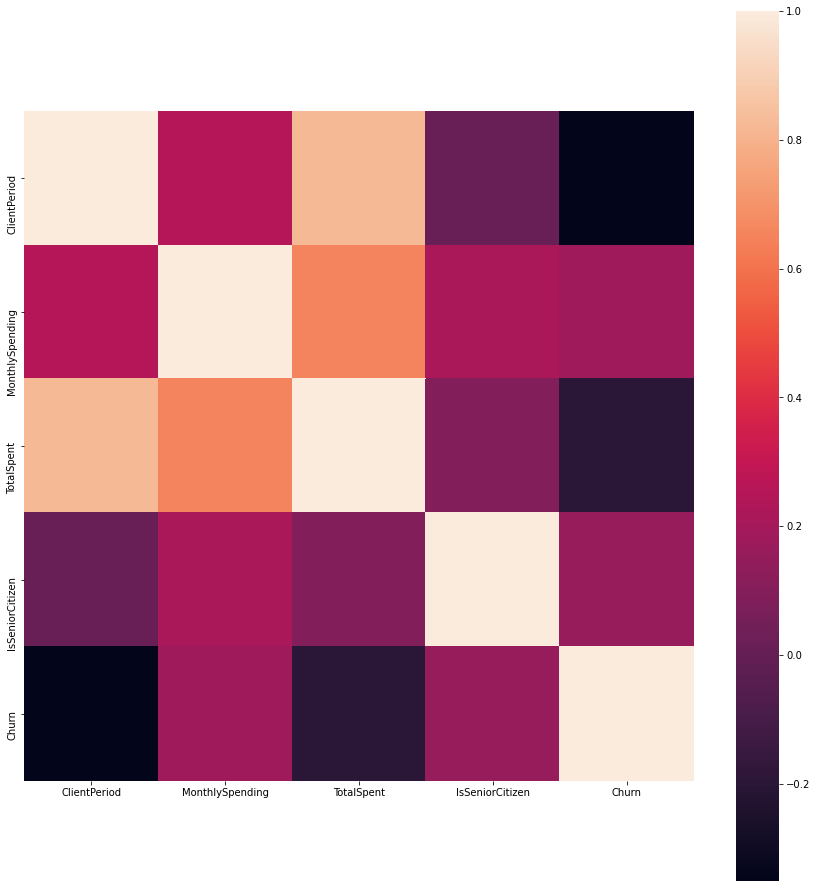

In [22]:
plt.figure(figsize=(15,16))
sns.heatmap(data.corr(), square=True)

**Вывод**: есть достаточно сильная корреляция между признаками *TotalSpent* и *CliendPeriod*. Можно попробовать убрать один из этих признаков и посмотреть на результат обучения.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [23]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

1. Нормируем данные

In [24]:
X_train, X_val, y_train, y_val = train_test_split(data[feature_cols], data[target_col], test_size=0.3, random_state=17)

In [25]:
ss = StandardScaler()

In [26]:
X_train[num_cols] = ss.fit_transform(X_train[num_cols])
X_val[num_cols] = ss.transform(X_val[num_cols])

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [28]:
label_encoders = dict()
for cat_col in cat_cols:
    le = LabelEncoder()
    le.fit(X_train[cat_col])
    X_train[cat_col] = le.transform(X_train[cat_col])
    label_encoders[cat_col] = le

In [29]:
for cat_col in cat_cols:
    le = label_encoders[cat_col]
    X_val[cat_col] = le.transform(X_val[cat_col])

In [30]:
ohe = OneHotEncoder()

In [31]:
X_train_cat = ohe.fit_transform(X_train[cat_cols]).toarray()

In [32]:
X_train = np.concatenate([X_train[num_cols], X_train_cat], axis=1)

In [33]:
X_val_cat = ohe.transform(X_val[cat_cols]).toarray()

In [34]:
X_val = np.concatenate([X_val[num_cols], X_val_cat], axis=1)

In [35]:
clf = LogisticRegressionCV(cv=5, random_state=0, scoring='roc_auc').fit(X_train, y_train)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [36]:
print("Train score:", clf.score(X_train, y_train))
print("Val score:", clf.score(X_val, y_val))
print("Param C=", clf.C_)

Train score: 0.8514464022624261
Val score: 0.838419865932758
Param C= [1291.54966501]


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

1. Стандартные параметры CatBoost.

In [62]:
X_train, X_val, y_train, y_val = train_test_split(data[feature_cols], data[target_col], test_size=0.3, random_state=17)

In [64]:
from catboost import CatBoost
model = CatBoost()

In [65]:
model.fit(X_train, y_train, cat_features=cat_cols)

Learning rate set to 0.049258
0:	learn: 0.4387405	total: 16.1ms	remaining: 16.1s
1:	learn: 0.4332734	total: 38.3ms	remaining: 19.1s
2:	learn: 0.4283619	total: 55.7ms	remaining: 18.5s
3:	learn: 0.4241296	total: 73.8ms	remaining: 18.4s
4:	learn: 0.4208278	total: 85.5ms	remaining: 17s
5:	learn: 0.4172475	total: 99ms	remaining: 16.4s
6:	learn: 0.4138523	total: 113ms	remaining: 16s
7:	learn: 0.4100444	total: 131ms	remaining: 16.2s
8:	learn: 0.4066910	total: 149ms	remaining: 16.4s
9:	learn: 0.4036701	total: 165ms	remaining: 16.4s
10:	learn: 0.4008561	total: 182ms	remaining: 16.4s
11:	learn: 0.3982784	total: 205ms	remaining: 16.9s
12:	learn: 0.3960371	total: 223ms	remaining: 16.9s
13:	learn: 0.3939375	total: 251ms	remaining: 17.7s
14:	learn: 0.3915781	total: 269ms	remaining: 17.7s
15:	learn: 0.3894627	total: 287ms	remaining: 17.6s
16:	learn: 0.3877662	total: 304ms	remaining: 17.6s
17:	learn: 0.3860908	total: 328ms	remaining: 17.9s
18:	learn: 0.3851364	total: 336ms	remaining: 17.4s
19:	learn: 

161:	learn: 0.3518818	total: 2.96s	remaining: 15.3s
162:	learn: 0.3518711	total: 2.98s	remaining: 15.3s
163:	learn: 0.3518673	total: 3s	remaining: 15.3s
164:	learn: 0.3518568	total: 3.01s	remaining: 15.2s
165:	learn: 0.3517763	total: 3.03s	remaining: 15.2s
166:	learn: 0.3516565	total: 3.05s	remaining: 15.2s
167:	learn: 0.3515615	total: 3.07s	remaining: 15.2s
168:	learn: 0.3514319	total: 3.09s	remaining: 15.2s
169:	learn: 0.3513054	total: 3.11s	remaining: 15.2s
170:	learn: 0.3511777	total: 3.13s	remaining: 15.2s
171:	learn: 0.3510476	total: 3.15s	remaining: 15.2s
172:	learn: 0.3510444	total: 3.17s	remaining: 15.2s
173:	learn: 0.3508460	total: 3.19s	remaining: 15.2s
174:	learn: 0.3507866	total: 3.21s	remaining: 15.2s
175:	learn: 0.3507864	total: 3.22s	remaining: 15.1s
176:	learn: 0.3506766	total: 3.25s	remaining: 15.1s
177:	learn: 0.3505376	total: 3.27s	remaining: 15.1s
178:	learn: 0.3504968	total: 3.29s	remaining: 15.1s
179:	learn: 0.3504897	total: 3.31s	remaining: 15.1s
180:	learn: 0.3

328:	learn: 0.3397296	total: 6.59s	remaining: 13.4s
329:	learn: 0.3395530	total: 6.61s	remaining: 13.4s
330:	learn: 0.3394582	total: 6.63s	remaining: 13.4s
331:	learn: 0.3393155	total: 6.64s	remaining: 13.4s
332:	learn: 0.3392677	total: 6.66s	remaining: 13.3s
333:	learn: 0.3391925	total: 6.68s	remaining: 13.3s
334:	learn: 0.3391650	total: 6.71s	remaining: 13.3s
335:	learn: 0.3391144	total: 6.73s	remaining: 13.3s
336:	learn: 0.3390603	total: 6.75s	remaining: 13.3s
337:	learn: 0.3389730	total: 6.76s	remaining: 13.2s
338:	learn: 0.3389068	total: 6.79s	remaining: 13.2s
339:	learn: 0.3387929	total: 6.8s	remaining: 13.2s
340:	learn: 0.3386529	total: 6.83s	remaining: 13.2s
341:	learn: 0.3385770	total: 6.84s	remaining: 13.2s
342:	learn: 0.3385150	total: 6.86s	remaining: 13.1s
343:	learn: 0.3383475	total: 6.88s	remaining: 13.1s
344:	learn: 0.3383387	total: 6.9s	remaining: 13.1s
345:	learn: 0.3382362	total: 6.91s	remaining: 13.1s
346:	learn: 0.3380455	total: 6.93s	remaining: 13s
347:	learn: 0.33

492:	learn: 0.3278551	total: 10.1s	remaining: 10.4s
493:	learn: 0.3278109	total: 10.2s	remaining: 10.4s
494:	learn: 0.3277591	total: 10.2s	remaining: 10.4s
495:	learn: 0.3277107	total: 10.2s	remaining: 10.4s
496:	learn: 0.3276370	total: 10.2s	remaining: 10.3s
497:	learn: 0.3275455	total: 10.2s	remaining: 10.3s
498:	learn: 0.3274845	total: 10.3s	remaining: 10.3s
499:	learn: 0.3274416	total: 10.3s	remaining: 10.3s
500:	learn: 0.3273409	total: 10.3s	remaining: 10.3s
501:	learn: 0.3272468	total: 10.3s	remaining: 10.3s
502:	learn: 0.3271667	total: 10.4s	remaining: 10.2s
503:	learn: 0.3271598	total: 10.4s	remaining: 10.2s
504:	learn: 0.3270886	total: 10.4s	remaining: 10.2s
505:	learn: 0.3270494	total: 10.4s	remaining: 10.2s
506:	learn: 0.3270189	total: 10.5s	remaining: 10.2s
507:	learn: 0.3269700	total: 10.5s	remaining: 10.2s
508:	learn: 0.3268942	total: 10.5s	remaining: 10.2s
509:	learn: 0.3268700	total: 10.6s	remaining: 10.1s
510:	learn: 0.3268237	total: 10.6s	remaining: 10.1s
511:	learn: 

657:	learn: 0.3174325	total: 13.9s	remaining: 7.24s
658:	learn: 0.3174090	total: 14s	remaining: 7.22s
659:	learn: 0.3172873	total: 14s	remaining: 7.2s
660:	learn: 0.3172673	total: 14s	remaining: 7.18s
661:	learn: 0.3171823	total: 14s	remaining: 7.16s
662:	learn: 0.3170438	total: 14s	remaining: 7.14s
663:	learn: 0.3169678	total: 14.1s	remaining: 7.12s
664:	learn: 0.3169101	total: 14.1s	remaining: 7.1s
665:	learn: 0.3167991	total: 14.1s	remaining: 7.07s
666:	learn: 0.3167838	total: 14.1s	remaining: 7.05s
667:	learn: 0.3167500	total: 14.2s	remaining: 7.03s
668:	learn: 0.3167275	total: 14.2s	remaining: 7.01s
669:	learn: 0.3166895	total: 14.2s	remaining: 6.99s
670:	learn: 0.3166418	total: 14.2s	remaining: 6.96s
671:	learn: 0.3165945	total: 14.2s	remaining: 6.94s
672:	learn: 0.3164318	total: 14.2s	remaining: 6.92s
673:	learn: 0.3163958	total: 14.3s	remaining: 6.9s
674:	learn: 0.3163210	total: 14.3s	remaining: 6.88s
675:	learn: 0.3162951	total: 14.3s	remaining: 6.86s
676:	learn: 0.3162476	tot

818:	learn: 0.3070202	total: 17.3s	remaining: 3.83s
819:	learn: 0.3069426	total: 17.3s	remaining: 3.81s
820:	learn: 0.3067480	total: 17.4s	remaining: 3.79s
821:	learn: 0.3066712	total: 17.4s	remaining: 3.77s
822:	learn: 0.3066276	total: 17.4s	remaining: 3.75s
823:	learn: 0.3065686	total: 17.5s	remaining: 3.73s
824:	learn: 0.3064613	total: 17.5s	remaining: 3.71s
825:	learn: 0.3063451	total: 17.5s	remaining: 3.69s
826:	learn: 0.3063022	total: 17.6s	remaining: 3.68s
827:	learn: 0.3062469	total: 17.6s	remaining: 3.66s
828:	learn: 0.3061310	total: 17.6s	remaining: 3.63s
829:	learn: 0.3060724	total: 17.6s	remaining: 3.62s
830:	learn: 0.3060263	total: 17.7s	remaining: 3.6s
831:	learn: 0.3059427	total: 17.7s	remaining: 3.58s
832:	learn: 0.3059022	total: 17.8s	remaining: 3.56s
833:	learn: 0.3058629	total: 17.8s	remaining: 3.54s
834:	learn: 0.3058219	total: 17.8s	remaining: 3.52s
835:	learn: 0.3057952	total: 17.8s	remaining: 3.5s
836:	learn: 0.3057657	total: 17.9s	remaining: 3.48s
837:	learn: 0.

986:	learn: 0.2968015	total: 21.3s	remaining: 281ms
987:	learn: 0.2967259	total: 21.4s	remaining: 259ms
988:	learn: 0.2967189	total: 21.4s	remaining: 238ms
989:	learn: 0.2966163	total: 21.4s	remaining: 216ms
990:	learn: 0.2965940	total: 21.4s	remaining: 195ms
991:	learn: 0.2965643	total: 21.5s	remaining: 173ms
992:	learn: 0.2965057	total: 21.5s	remaining: 151ms
993:	learn: 0.2963881	total: 21.5s	remaining: 130ms
994:	learn: 0.2963170	total: 21.5s	remaining: 108ms
995:	learn: 0.2962396	total: 21.5s	remaining: 86.5ms
996:	learn: 0.2962291	total: 21.6s	remaining: 64.9ms
997:	learn: 0.2961955	total: 21.6s	remaining: 43.4ms
998:	learn: 0.2961512	total: 21.7s	remaining: 21.7ms
999:	learn: 0.2960587	total: 21.7s	remaining: 0us


In [66]:
from sklearn.metrics import roc_auc_score as ras

In [67]:
ras(y_train, model.predict(X_train))

0.9197088149239484

In [68]:
ras(y_val, model.predict(X_val))

0.8291609284786452

**Вывод**: стандартная модель сильно переобучается на train. 

2. Подбор параметров.

Здесь была долгая работа по работе с grid_search и ручному подбору параметров перебором. К сожалению, до финальной версии дожили лишь окончательные параметры, а параметры grid_search канули в небытие, поскольку сильно переобучали модель на тренировочную выборку (даже с прикрутом cv). grid_search использовался из библиотеки catBoost

In [69]:
params = {"iterations": 150,
          "depth": 5,
          "bagging_temperature": 100,
          "min_child_samples": 5,
          "learning_rate": 0.1,
          'l2_leaf_reg': 5
         }

In [70]:
model = CatBoost(params)

In [71]:
model.fit(X_train, y_train, cat_features=cat_cols)

0:	learn: 0.4350309	total: 13.3ms	remaining: 1.98s
1:	learn: 0.4257807	total: 26.9ms	remaining: 1.99s
2:	learn: 0.4179674	total: 40.4ms	remaining: 1.98s
3:	learn: 0.4114521	total: 53.1ms	remaining: 1.94s
4:	learn: 0.4057344	total: 79.7ms	remaining: 2.31s
5:	learn: 0.4027274	total: 86.1ms	remaining: 2.07s
6:	learn: 0.3983022	total: 97.8ms	remaining: 2s
7:	learn: 0.3944213	total: 110ms	remaining: 1.96s
8:	learn: 0.3910900	total: 124ms	remaining: 1.94s
9:	learn: 0.3888090	total: 137ms	remaining: 1.92s
10:	learn: 0.3865441	total: 145ms	remaining: 1.83s
11:	learn: 0.3839502	total: 157ms	remaining: 1.8s
12:	learn: 0.3818064	total: 170ms	remaining: 1.79s
13:	learn: 0.3801001	total: 181ms	remaining: 1.76s
14:	learn: 0.3782163	total: 195ms	remaining: 1.75s
15:	learn: 0.3768362	total: 207ms	remaining: 1.73s
16:	learn: 0.3758897	total: 224ms	remaining: 1.76s
17:	learn: 0.3752174	total: 233ms	remaining: 1.71s
18:	learn: 0.3742304	total: 245ms	remaining: 1.69s
19:	learn: 0.3733112	total: 258ms	rema

In [72]:
ras(y_train, model.predict(X_train, prediction_type='Probability')[:,1])

0.871441614765057

In [73]:
ras(y_val, model.predict(X_val, prediction_type='Probability')[:,1])

0.8420148316774045

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**Вывод**: получилось настроить параметры так, чтобы модель меньше переобучалась. 

In [74]:
print("Train score: 0.871441614765057")
print("Val score: 0.8420148316774045")
print("Params:", params)

Train score: 0.871441614765057
Val score: 0.8420148316774045
Params: {'iterations': 150, 'depth': 5, 'bagging_temperature': 100, 'min_child_samples': 5, 'learning_rate': 0.1, 'l2_leaf_reg': 5}


## Ансамбль линейной модели и CatBoost

Попробуем сделать линейную свертку линейной модели и CatBoost.

In [76]:
X_train_linear, X_val_linear = X_train.copy(), X_val.copy()

In [77]:
X_train_linear

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
235,22,79.20,1742.75,Female,0,Yes,No,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
110,15,65.60,1010.00,Female,0,No,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Credit card (automatic)
292,12,91.30,1094.50,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check
713,7,35.50,249.55,Male,0,No,No,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic)
1754,21,36.00,780.15,Male,0,No,No,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,66,100.80,6690.75,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
1337,14,61.40,815.55,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,No,No,No,Yes,Two year,Yes,Bank transfer (automatic)
406,1,69.50,69.50,Male,1,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
2191,14,74.95,1036.75,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [78]:
X_train_linear[num_cols] = ss.transform(X_train_linear[num_cols])
X_val_linear[num_cols] = ss.transform(X_val_linear[num_cols])

In [79]:
for cat_col in cat_cols:
    le = label_encoders[cat_col]
    X_train_linear[cat_col] = le.transform(X_train_linear[cat_col])
    X_val_linear[cat_col] = le.transform(X_val_linear[cat_col])

In [80]:
X_train_linear_cat = ohe.transform(X_train_linear[cat_cols]).toarray()
X_val_linear_cat = ohe.transform(X_val_linear[cat_cols]).toarray()

In [81]:
X_train_linear = np.concatenate([X_train_linear[num_cols], X_train_linear_cat], axis=1)
X_val_linear = np.concatenate([X_val_linear[num_cols], X_val_linear_cat], axis=1)

In [82]:
cl_pred_train = clf.predict_proba(X_train_linear)
cl_pred_val = clf.predict_proba(X_val_linear)

In [83]:
cb_pred_train = model.predict(X_train, prediction_type='Probability')

In [84]:
cb_pred_val = model.predict(X_val, prediction_type='Probability')

Попробуем линейную свертку с кэфами 1/10 - 9/10, 2/10 - 8/10, ..., 9/10 - 1/10.

In [85]:
def linear_coeffs(i, factor):
    coeff = i / factor
    return coeff, 1 - coeff

In [87]:
factor = 10
for i in range(1, factor):
    c1, c2 = linear_coeffs(i, factor)
    print("Coeffs: ", c1, c2)
    agg_pred_train = cl_pred_train * c1 + cb_pred_train * c2
    agg_pred_val = cl_pred_val * c1 + cb_pred_val * c2
    print("Train:", ras(y_train, agg_pred_train[:,1]))
    print("Val:", ras(y_val, agg_pred_val[:,1]))
    print()

Coeffs:  0.1 0.9
Train: 0.8672088297459217
Val: 0.8425969771877159

Coeffs:  0.2 0.8
Train: 0.8637119557000863
Val: 0.8419279442878056

Coeffs:  0.3 0.7
Train: 0.8609847126167601
Val: 0.8411416134119375

Coeffs:  0.4 0.6
Train: 0.8587840201341684
Val: 0.8405399182389662

Coeffs:  0.5 0.5
Train: 0.8569931552127398
Val: 0.8402836004396501

Coeffs:  0.6 0.4
Train: 0.8555309675487718
Val: 0.8397123158530386

Coeffs:  0.7 0.30000000000000004
Train: 0.8542799930040287
Val: 0.8392409517644657

Coeffs:  0.8 0.19999999999999996
Train: 0.8532087348852928
Val: 0.8389346737161303

Coeffs:  0.9 0.09999999999999998
Train: 0.8522805088086987
Val: 0.8386740115473341



**Вывод**: ансамбль с кэфами 1/10 - 9/10 показывает наилучший результат. Эту модель выберем в качестве итоговой.

# Предсказания

Подготовим тестовые данные, чтобы с ними могла работать и линейная модель.

In [88]:
X_test = pd.read_csv('./test.csv')

Заполним пропуски *TotalSpent* медианой.

In [89]:
X_test['TotalSpent'].replace({' ': total_spent_median}, inplace=True)

In [90]:
X_test_l = X_test.copy()

In [91]:
X_test_l[num_cols] = ss.transform(X_test_l[num_cols])

In [92]:
for cat_col in cat_cols:
    le = label_encoders[cat_col]
    X_test_l[cat_col] = le.transform(X_test_l[cat_col])

In [93]:
X_test_l_cat = ohe.transform(X_test_l[cat_cols]).toarray()

In [94]:
X_test_l = np.concatenate([X_test_l[num_cols], X_test_l_cat], axis=1)

Делаем предикт обеими моделями.

In [95]:
cl_pred_test = clf.predict_proba(X_test_l)

In [96]:
cb_pred_test = model.predict(X_test, prediction_type='Probability')

Запишем конечный результат.

In [97]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = (cl_pred_test * (1 / 10) + cb_pred_test * (1 - 1 / 10))[:,1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

**Продублирую.**

Ник на  Kaggle: Alexander_Morshinin

Score на момент отправки тетради: 0.84906